**Import Libraries
**

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier



In [240]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [241]:
PassengerId = test['PassengerId']

In [242]:
PassengerId.shape

(418,)

In [243]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Preprocessing and EDA**

In [244]:
train.shape

(891, 12)

In [245]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [246]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [248]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

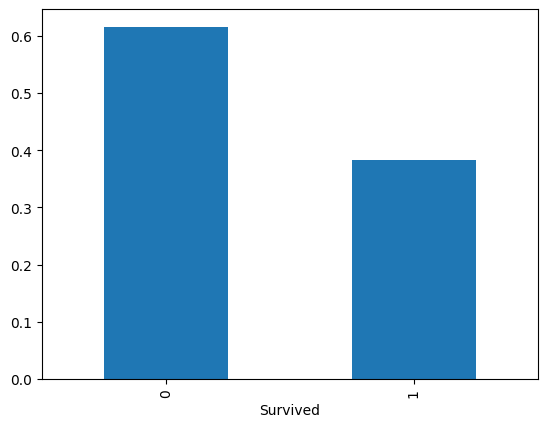

In [249]:
(train["Survived"].value_counts(normalize=True)).plot(kind='bar')

<BarContainer object of 248 artists>

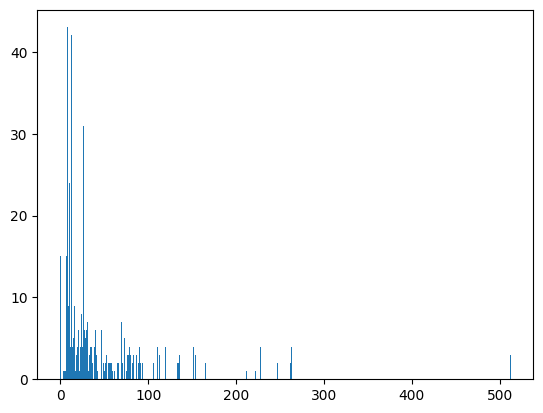

In [250]:
plt.bar((train['Fare'].value_counts()).index, (train['Fare'].value_counts()).values,width=0.9)


<Axes: xlabel='Sex', ylabel='count'>

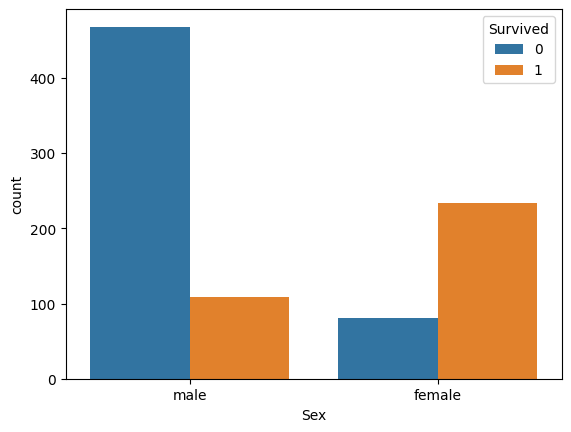

In [251]:
sns.countplot(data=train,x='Sex',hue='Survived')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


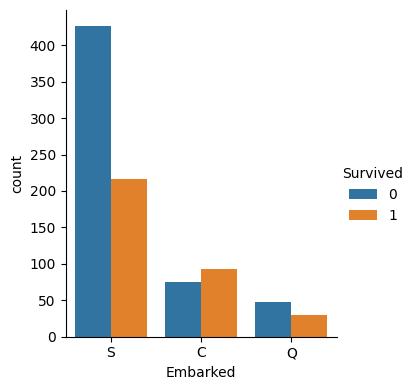

In [252]:
sns.catplot(x="Embarked", hue="Survived", data=train, kind="count", height=4, aspect=0.9)

In [253]:
train.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

In [254]:
train['Age'].agg(['min', 'max','mean'])

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

In [255]:
train[train['Age']==train['Age'].min()]['Survived']

803    1
Name: Survived, dtype: int64

In [256]:
train["Fare"].max()

512.3292

In [257]:
train[train["Fare"]==train['Fare'].max()]['Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

In [258]:
train[train["Fare"]==train['Fare'].max()]['Cabin']

258            NaN
679    B51 B53 B55
737           B101
Name: Cabin, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


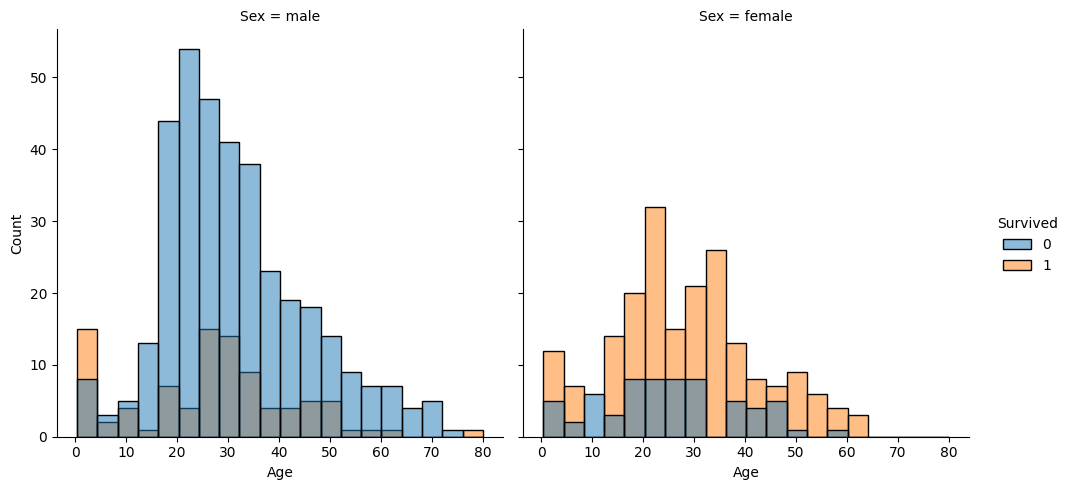

In [259]:
sns.displot(data=train,x='Age',col="Sex",hue='Survived')

In [260]:
train['Family']=train['SibSp']+train['Parch']+1


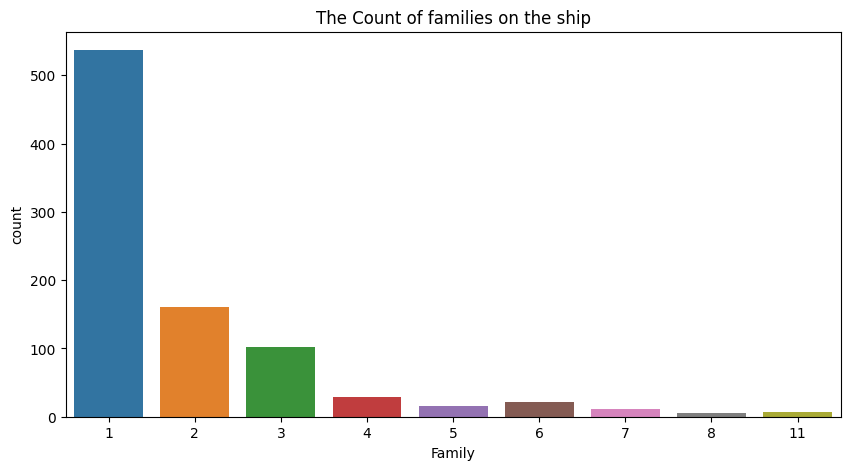

In [261]:
plt.figure(figsize=(10,5))
plt.title("The Count of families on the ship");
sns.countplot(data=train,x='Family');


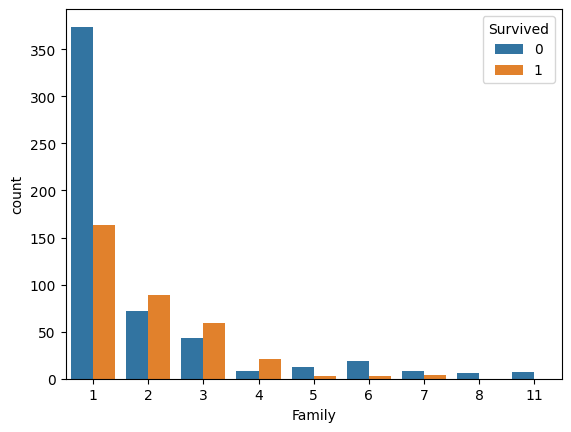

In [262]:
sns.countplot(data=train,x="Family",hue='Survived');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


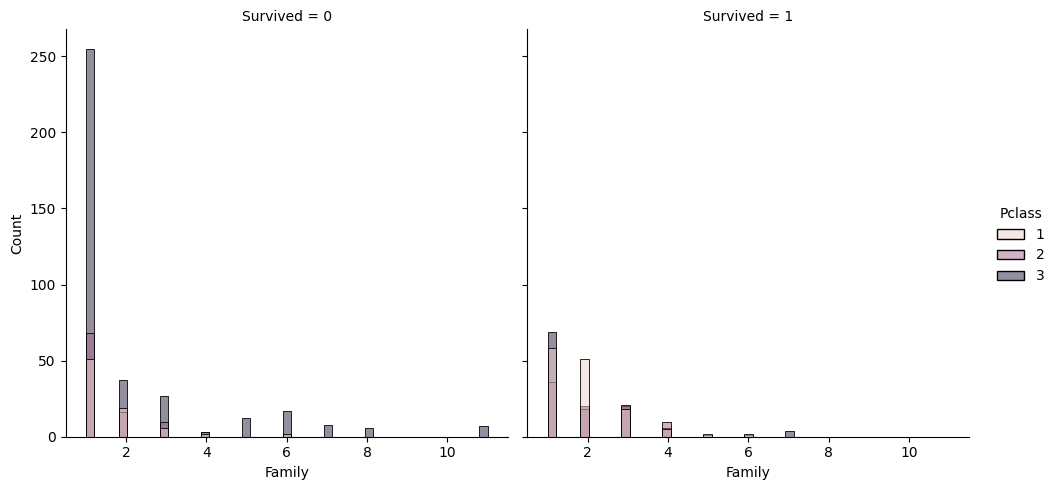

In [263]:
sns.displot(data=train,x='Family',col="Survived",hue='Pclass')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


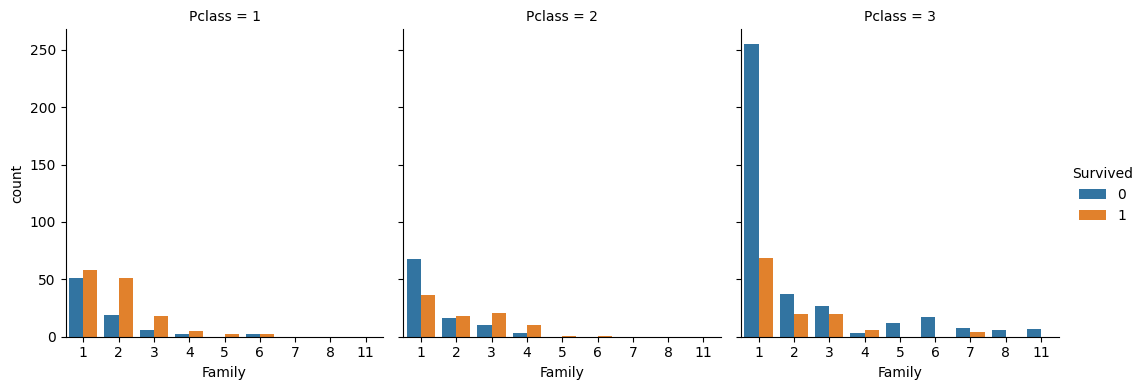

In [264]:
sns.catplot(x="Family", hue="Survived", col="Pclass",
                data=train, kind="count", height=4, aspect=0.9)

In [265]:
train[(train['Family']==1)& train['Survived']==1]['Sex'].value_counts(normalize=True)

Sex
female    0.607362
male      0.392638
Name: proportion, dtype: float64

In [266]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [267]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [268]:

X, y = train.drop('Survived', axis=1), train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [269]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [270]:
for data in[X_train,X_test,test]:
    title_second_part=data['Name'].str.split(',').str[1]
    title_only=title_second_part.str.split('.').str[0]
    data['title']=title_only.str.strip()
    data['title'].value_counts()
    

In [271]:
X_train['title'].unique()

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms', 'the Countess', 'Lady'], dtype=object)

In [272]:
def age_fill(data):
    average_age_by_title = data.groupby('title')['Age'].mean()
    return data.apply(lambda row: average_age_by_title[row['title']] if pd.isna(row['Age']) else row['Age'], axis=1)

# Apply the age_fill function to fill missing ages based on titles
X_train['Age'] = age_fill(X_train)
X_test['Age'] = age_fill(X_test)
test['Age']=age_fill(test)
test['Age'].fillna(test['Age'].mean(),inplace=True)

<Axes: xlabel='title'>

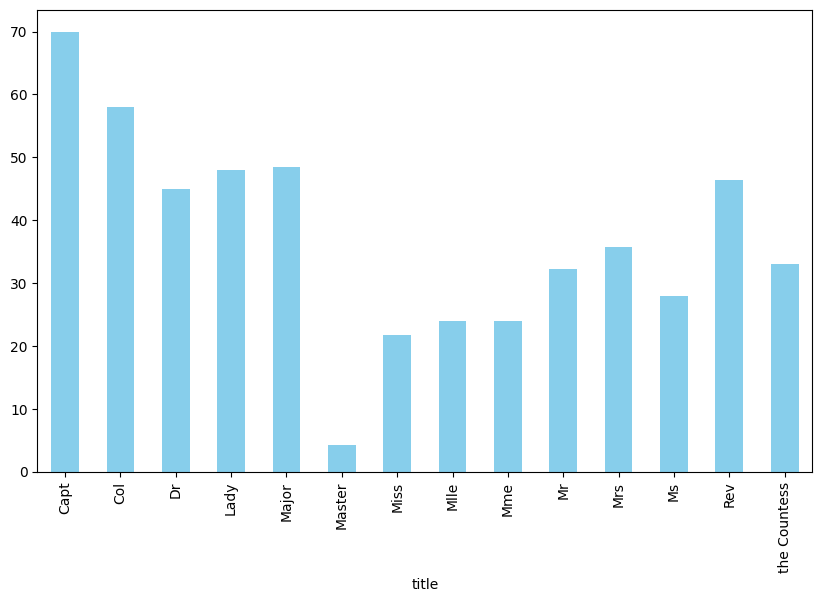

In [273]:
average_age_by_title = X_train.groupby('title')['Age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_age_by_title.plot(kind='bar', color='skyblue')

In [274]:
for data in[X_train,X_test,test]:
    counts = data['title'].value_counts()

    # Update the DataFrame to replace counts with 'others'
    counts['others'] = counts[4:].sum()

    # Replace values directly in the 'title' column using loc
    data.loc[data['title'].isin(counts.index[4:]), 'title'] = 'others'
    data['title'].value_counts()

In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [276]:
for data in [X_train, X_test,test]:
    
    embarked_mode=data['Embarked'].mode()[0]
    data['Embarked'].fillna(embarked_mode,inplace=True)
    
## Remove Irrelevant Features 

for data in [X_train, X_test]:
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Family','title'],axis=1,inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','title'],axis=1,inplace=True)

In [277]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [278]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [279]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [280]:

for value in [X_train, X_test,test]:
    value['Sex'].replace({'female':1,'male':0},inplace=True)
    value['Embarked'].replace({'S':0, 'C':1, 'Q':2},inplace=True)

In [281]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [282]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [283]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [284]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [285]:
logistic_model = LogisticRegression(max_iter=1200, random_state=42)

In [286]:
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1200, random_state=42)

In [287]:
y_pred=logistic_model.predict(X_test)


In [288]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predict No','Predict Yes'],index=['Actual No','Actual Yes'])

,Predict No,Predict Yes
Actual No,90,15
Actual Yes,20,54


In [289]:

print('Train accuracy is = ',accuracy_score(y_train,logistic_model.predict(X_train)))


Train accuracy is =  0.8019662921348315


Using SVC (non-linear)

In [290]:
svc_classifier=SVC(kernel='rbf',C=10, probability=True)
svc_classifier.fit(X_train,y_train)
print('Train accuracy:', accuracy_score(y_train, svc_classifier.predict(X_train)))


Train accuracy: 0.7275280898876404


In [291]:
rndm_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rndm_clf.fit(X_train,y_train)
print('Train accuracy by using RandomForest:', accuracy_score(y_train, rndm_clf.predict(X_train)))


Train accuracy by using RandomForest: 0.9803370786516854


In [292]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 11.2 KB


In [293]:


voting_clf = VotingClassifier(
    estimators=[('lr', logistic_model), ('rf', rndm_clf), ('svc', svc_classifier)],
    voting='hard')
voting_clf.fit(X_train, y_train)
print('Finding the accuracy ')
for clf in (logistic_model, rndm_clf, svc_classifier, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(" ",clf.__class__.__name__, accuracy_score(y_test, y_pred))
print('\n =======================')
voting_clf = VotingClassifier(
    estimators=[('lr', logistic_model), ('rf', rndm_clf), ('svc', svc_classifier)],
    voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (logistic_model, rndm_clf, svc_classifier, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    


Finding the accuracy 
  LogisticRegression 0.8044692737430168
  RandomForestClassifier 0.8268156424581006
  SVC 0.7206703910614525
  VotingClassifier 0.8156424581005587

LogisticRegression 0.8044692737430168
RandomForestClassifier 0.8268156424581006
SVC 0.7206703910614525
VotingClassifier 0.8268156424581006


In [294]:
accuracy_score(y_test, rndm_clf.predict(X_test))

0.8268156424581006

In [295]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [296]:
Prediction = rndm_clf.predict(test)



In [297]:
Submission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': Prediction })


In [298]:
Submission.to_csv('Submission_file.csv',index=False)